## Decision Trees


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

## Load and Check Dataset



In [4]:
df=pd.read_csv("iris.csv")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.shape

(150, 5)

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


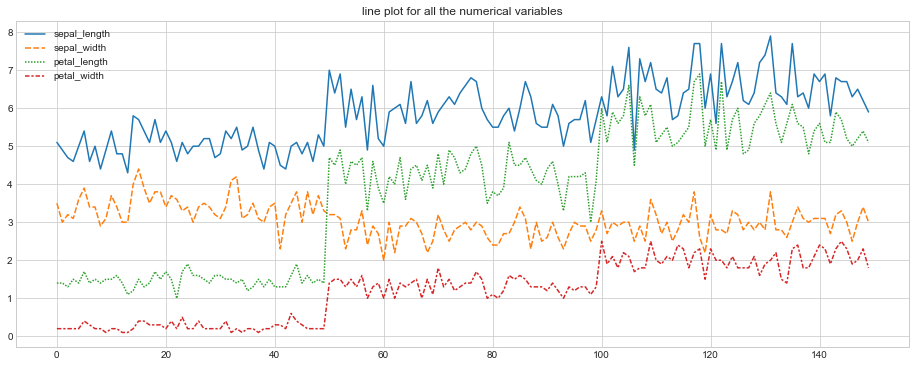

In [11]:
plt.figure(figsize= (16, 6)) #50şerli kümelenmeler var burda.50de bir basamak çıkıyor. Bağımsız değişkenler de içiiçe girmemiş iyi haber.
sns.lineplot(data = df.select_dtypes(exclude= "object"))

plt.title("line plot for all the numerical variables")
plt.show()

In [12]:
df.species.value_counts

<bound method IndexOpsMixin.value_counts of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object>

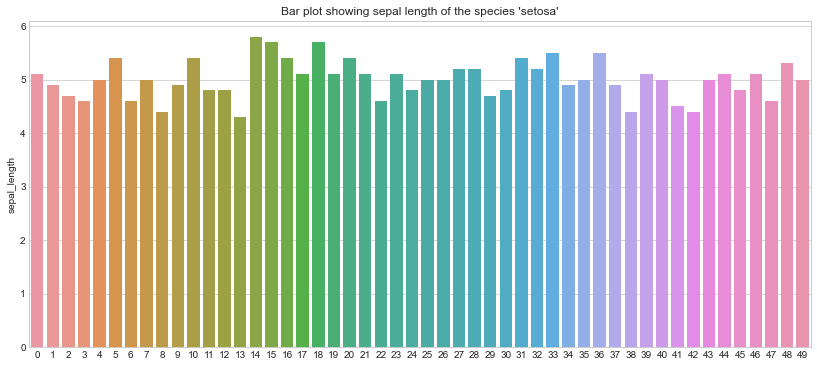

In [13]:
plt.figure(figsize = (14, 6)) #renk değişimi kafanı karıştırmasın,burda tek alttipteki veirlerin kendi içinde benzer rakamlar olduğunu,benzer şekilde dağıldığını görüyoruz.

sns.barplot(x=df.index[df['species']=='setosa'], y=df['sepal_length'][df['species']=='setosa'])

plt.title("Bar plot showing sepal length of the species 'setosa'")
plt.show()

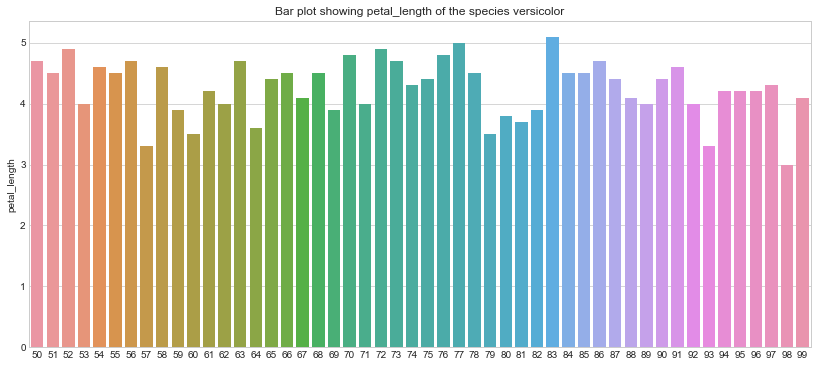

In [14]:
plt.figure(figsize = (14, 6))

sns.barplot(x=df.index[df['species']=='versicolor'], y=df['petal_length'][df['species']=='versicolor'])

plt.title("Bar plot showing petal_length of the species versicolor")
plt.show()

In [ ]:
plt.figure(figsize = (14, 6))

sns.barplot(x=df.index[df['species']=='virginica'], y=df['sepal_width'][df['species']=='virginica'])

plt.title("Bar plot showing sepal_width of the species virginica")
plt.show()

In [17]:
df_corr=df.corr()#burda multicolinearity var ama yukarda ayrışmalar netti grafikte,o yüzden multicolerasyonu ekerte edebileceğiz kümeleme yöntemi ile.
df_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


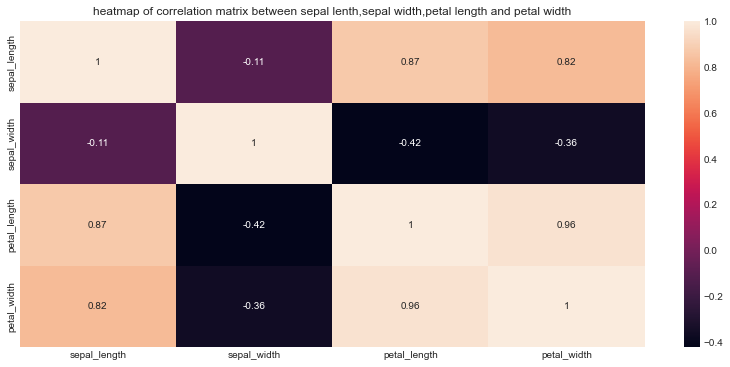

In [21]:
df_corr=df.select_dtypes(exclude="object").corr()
plt.figure(figsize=(14,6))
sns.heatmap(data=df_corr,annot=True)
plt.title("heatmap of correlation matrix between sepal lenth,sepal width,petal length and petal width");


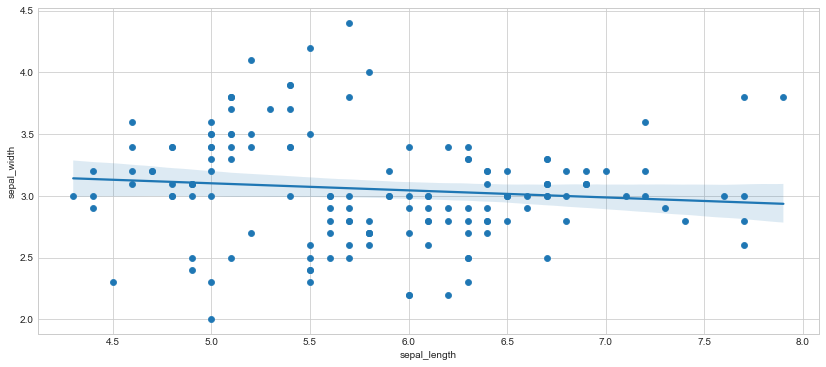

In [24]:
#scatter plot between sepal length and sepal width
plt.figure(figsize=(14,6))
sns.scatterplot(x=df["sepal_length"],y=df["sepal_width"])
sns.regplot(x=df["sepal_length"],y=df["sepal_width"]);
#yani lineer model iyi değil burada

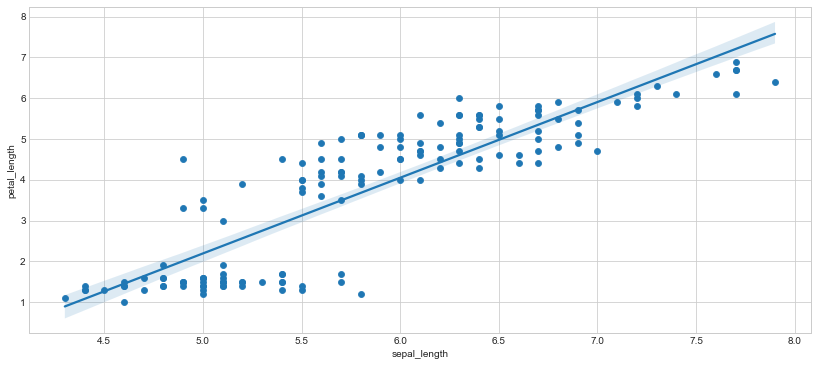

In [26]:
plt.figure(figsize = (14, 6))
sns.scatterplot(x = df["sepal_length"], y = df["petal_length"])
sns.regplot(x = df["sepal_length"], y = df["petal_length"])
plt.show() #bu lineere daha yakın

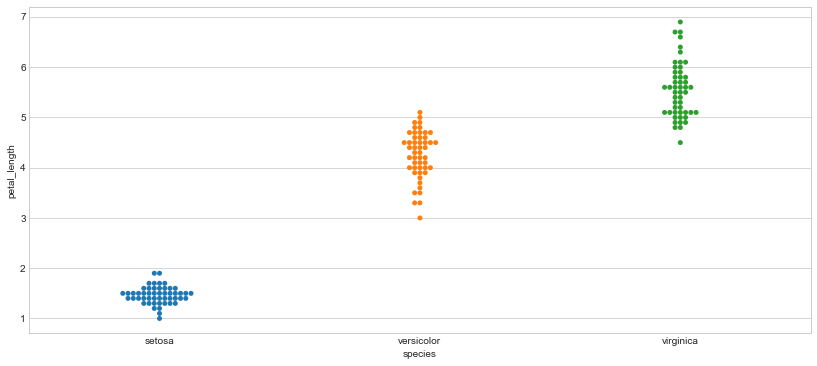

In [27]:
plt.figure(figsize=(14,6))
sns.swarmplot(x=df["species"],y=df["petal_length"]); #yine kümelenmenin güzel olduğunu görüyoruz burada

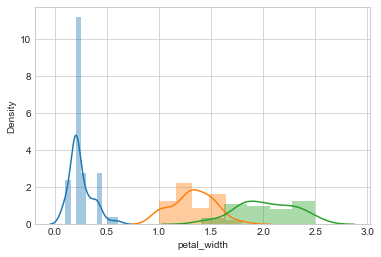

In [28]:
sns.distplot(df["petal_width"][df["species"] == "setosa"], label = "setosa", kde = True)

sns.distplot(df["petal_width"][df["species"] == "versicolor"], label = "versicolor", kde = True)

sns.distplot(df["petal_width"][df["species"] == "virginica"], label = "virginica", kde = True)
plt.show()

## Determine Dependent and Independent Variables



In [29]:
X=df.drop("species",axis=1)
y=df["species"]

In [30]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [33]:
from sklearn.preprocessing import LabelEncoder #label encoder classified tüm datalarda modelleme yaparken kullanılabiliyor

In [35]:
labelencoder_y=LabelEncoder()#3 grubumuz vardı target valuelarda bunları rakama çevirdik bu functionla.
y=labelencoder_y.fit_transform(y)


In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Split Train and Test Data



In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [40]:
print(X_train.shape, "-", X_test.shape, "-", y_train.shape, "-", y_test.shape)

(112, 4) - (38, 4) - (112,) - (38,)


In [42]:
from sklearn.preprocessing import MinMaxScaler #min max dediğimiz nedir 0 ile 1 arasına sıkıştırmaktır.Target hariç tüm dataları sıkıştıracağız.
sc=MinMaxScaler()
#std = (X - X.min(axis= 0)) / (X.max(axis= 0) - X.min(axis = 0))
#X_scaled = X_std * (max - min) + min bu iki satır min maxın açılımı.1. satırda standart sapmayı buluyoruz,ordan da scale ediyoruz 0-1e 2. satırda

In [43]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [46]:
pd.DataFrame(X_train).describe()#kontrol ediyoruz scale olmuş mu,0-1 arasında mıyız,outlierlar törpülenmiş mi yani.outlierlar zaten scaling öncesi siliniyor eğer illa silinecekse,ama veri kaybı olmasın diye scalingle törpüleme tercih ediliyor.

,0,1,2,3
count,112.000000,112.000000,112.000000,112.000000
mean,0.440724,0.438244,0.464901,0.467634
std,0.242032,0.181748,0.310465,0.326109
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.081897,0.083333
50%,0.416667,0.416667,0.543103,0.500000
75%,0.611111,0.541667,0.706897,0.750000
max,1.000000,1.000000,1.000000,1.000000


## Modeling


In [47]:
from sklearn.tree import DecisionTreeClassifier(2 #tane var biri classifier,biri regression diye bu functionun.Ne planlıyorsan unu kullanıyorsun)

In [48]:
dt_model=DecisionTreeClassifier(criterion="gini",min_samples_split=2)#ya gini ya entrophy seçiliyormuş kriterion için.min demek de 2den başla gerek görürsen birer birer arttırarak kontrol et demekmiş.Düşükten başlatıp yukarı doğru saydırıyoruz,max depth deseydik yukarı çıkacağı rakamı belirlerdik,oraya gelince dururdu.
                               

In [50]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=dt_model.predict(X_test) #modeli test verisiyle sınadık

In [53]:
y_train_pred=dt_model.predict(X_train) #modeli train verisiyle sınadık

In [54]:
my_dict={"Actual":y_test,"Pred":y_pred}#kıyaslayabilmek için test datası sonuç ve test datası tahminleri tablo yapıyoruz.

In [55]:
pd.DataFrame.from_dict(my_dict).head(20)#fena gözükmüyor.

,Actual,Pred
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [57]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [60]:
confusion_matrix(y_test,y_pred)#2. grupta 1 hata yapmış,visualize edelim alt satırda.

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

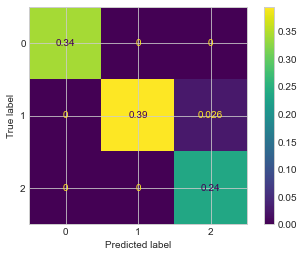

In [61]:
plot_confusion_matrix(dt_model,X_test,y_test,normalize="all");#normalise dersek 1 ile 0 arası sıkıştırıyor=yüsdelik veriyor yani.

In [62]:
print(classification_report(y_test, y_pred))#yukarının raporlanmış hali.test datayı ne oranda doğru biliyor onu görüyoruz.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [63]:
print(classification_report(y_train, y_train_pred))#ne oranda train etmişiz raporu.train ysini .full doğru biliyor,iyi train olmuş

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        41

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [64]:
my_dict = {"Actual": y_train, "Pred": y_train_pred} #burda da train datasını yazdırıyoruz.

In [65]:
pd.DataFrame.from_dict(my_dict).head(20)

,Actual,Pred
0,1,1
1,1,1
2,2,2
3,0,0
4,2,2
5,0,0
6,0,0
7,1,1
8,2,2
9,2,2
